# Introduction

The goal of this report is to examine how global temperature changes have impacted changes in forest area over the last thirty years. The aim is to analyze the global impact of temperature fluctuations on forest ecosystems by utilizing historical data on average temperature changes and forest area measurements between 1990 and 2021.
<br> This report discusses the results of the analysis, providing details on the impact of temperature changes on the extent of forested areas. The visuals and statistical patterns talked about here give a better insight into the intricate relationship between climate change and forest ecosystems.
<br> The analysis conducted in this report seeks to answer several key questions regarding the relationship between global temperature changes and forest area variations. These questions include:
1. How have global temperatures changed over the past three decades?
2. How has the forest area globally changed over the same period?
3. Is there a correlation between temperature changes and forest area variations?
4. What are the overall trends in the data?

In [10]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load Data from World Forest Data

In [11]:
db_path = '../data/world_forest_data.sqlite'
engine = create_engine(f'sqlite:///{db_path}')
query = "SELECT * FROM world_forest_data"
df_forest_area = pd.read_sql_query(query, engine)
df_forest_area.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,12084.4,12084.40,12084.40,12084.40,12084.40,12084.4,12084.40,12084.40,12084.40,...,12084.40,12084.400,12084.40,12084.400,12084.4,12084.400,12084.4,12084.4,12084.4,12084.400
1,Albania,7888.0,7868.50,7849.00,7829.50,7810.00,7790.5,7771.00,7751.50,7732.00,...,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889.0,7889.0,7889.0,7889.000
2,Algeria,16670.0,16582.00,16494.00,16406.00,16318.00,16230.0,16142.00,16054.00,15966.00,...,19332.00,19408.000,19484.00,19560.000,19560.0,19430.000,19300.0,19390.0,19490.0,19583.333
3,American Samoa,180.7,180.36,180.02,179.68,179.34,179.0,178.66,178.32,177.98,...,173.70,173.400,173.10,172.800,172.5,172.200,171.9,171.6,171.3,171.000
4,Andorra,160.0,160.00,160.00,160.00,160.00,160.0,160.00,160.00,160.00,...,160.00,160.000,160.00,160.000,160.0,160.000,160.0,160.0,160.0,160.000


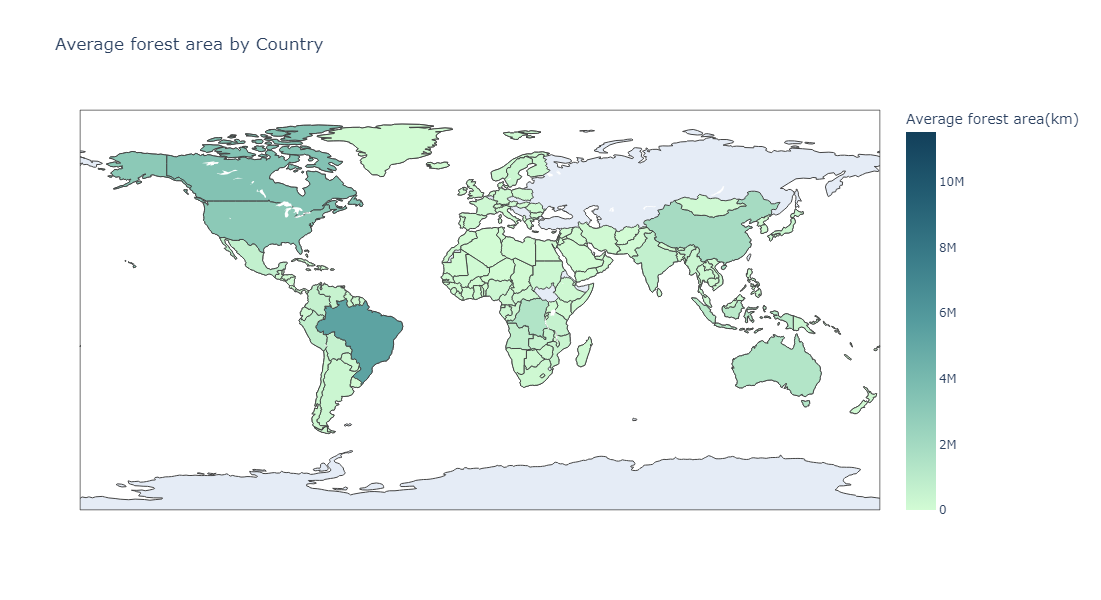

In [16]:
x_column = 'Country Name'  
df_forest_area['avgForestArea'] = df_forest_area.drop(columns=x_column).mean(axis=1)
fig = px.choropleth(df_forest_area, locations='Country Name', locationmode='country names', color='avgForestArea',
                    hover_name='Country Name', color_continuous_scale='darkmint',
                    labels={'avgForestArea': 'Average forest area(km)'},
                    title='Average forest area by Country')
fig.update_layout(
    width=900, 
    height=600,  
)
fig.show()

## Load Data from Global Temprature Data

In [14]:
db_path = '../data/global_temperature_data.sqlite'
engine = create_engine(f'sqlite:///{db_path}')
query = "SELECT * FROM global_temperature_data"
df_temp_changes = pd.read_sql_query(query, engine)
df_temp_changes.head()

,ObjectId,Country Name,Unit,Change,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,"Afghanistan, Islamic Rep. of",Degree Celsius,Surface Temperature Change,0.847,-0.058,-0.214,0.292,0.554,0.474,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,2,Albania,Degree Celsius,Surface Temperature Change,0.814,-0.263,0.105,0.117,1.370,-0.136,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,3,Algeria,Degree Celsius,Surface Temperature Change,1.270,0.034,-0.318,0.541,0.720,0.583,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,5,"Andorra, Principality of",Degree Celsius,Surface Temperature Change,1.724,0.215,0.368,0.175,1.502,1.245,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
4,6,Angola,Degree Celsius,Surface Temperature Change,0.808,0.440,0.606,0.401,0.373,0.880,...,0.576,1.090,0.879,1.430,1.847,1.064,1.504,1.975,1.387,1.631


## Average temperature by country

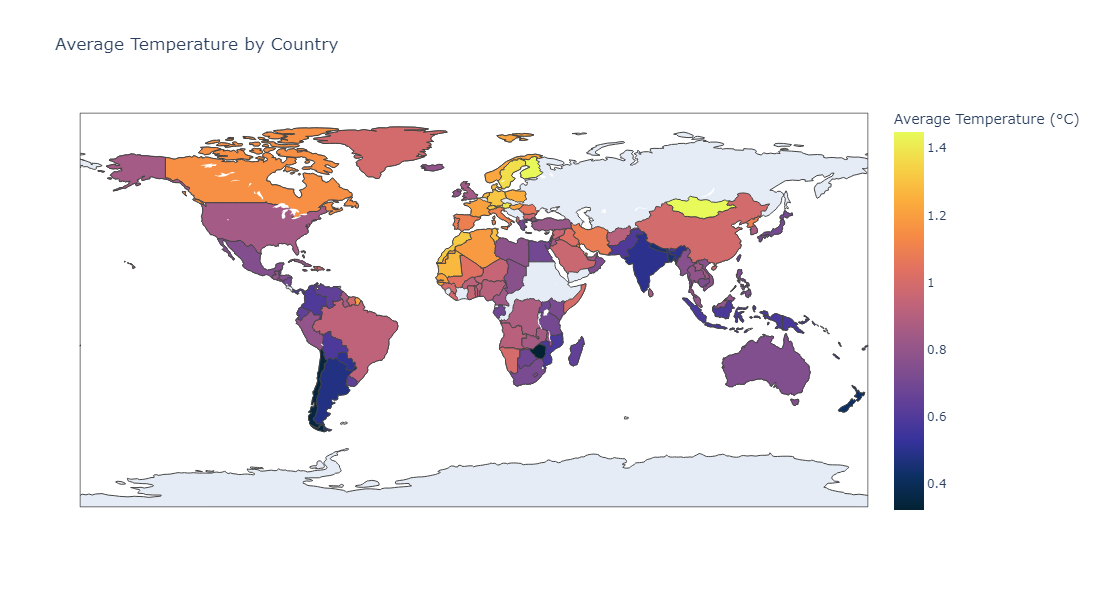

In [13]:
x_column = 'Country Name'  
exclude_column1='ObjectId'
exclude_column3='Unit'
exclude_column2='Change '
columns_to_exclude = [x_column, exclude_column1, exclude_column2, exclude_column3]
df_temp_changes['Avg_Temperature'] = df_temp_changes.drop(columns=columns_to_exclude).mean(axis=1)
fig = px.choropleth(df_temp_changes, locations='Country Name', locationmode='country names', color='Avg_Temperature',
                    hover_name='Country Name', color_continuous_scale='thermal',
                    labels={'Avg_Temperature': 'Average Temperature (°C)'},
                    title='Average Temperature by Country')
fig.update_layout(
    width=900,  
    height=600,  
)
fig.show()


## Average Global Temperature change by decade

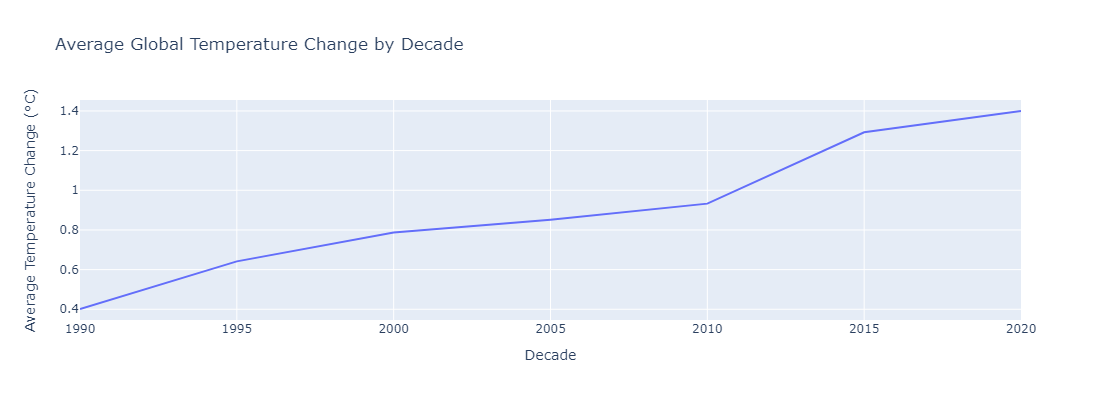

In [7]:
df_temp_changes.set_index('Country Name', inplace=True)
df_temp_melted = df_temp_changes.reset_index().melt(id_vars=["Country Name"], var_name="Year", value_name="Temperature Change")
df_temp_melted = df_temp_melted[df_temp_melted['Year'].str.isnumeric()]
df_temp_melted['Year'] = df_temp_melted['Year'].astype(int)
df_temp_melted['Decade'] = (df_temp_melted['Year'] // 5) * 5
df_decade_avg = df_temp_melted.groupby('Decade')['Temperature Change'].mean().reset_index()
fig = px.line(df_decade_avg, x='Decade', y='Temperature Change',
              title='Average Global Temperature Change by Decade',
              labels={'Temperature Change': 'Average Temperature Change (°C)', 'Decade': 'Decade'})
fig.update_layout(width=800, height=400)
fig.show()

# Analysis of how temprature changes affect the global temprature

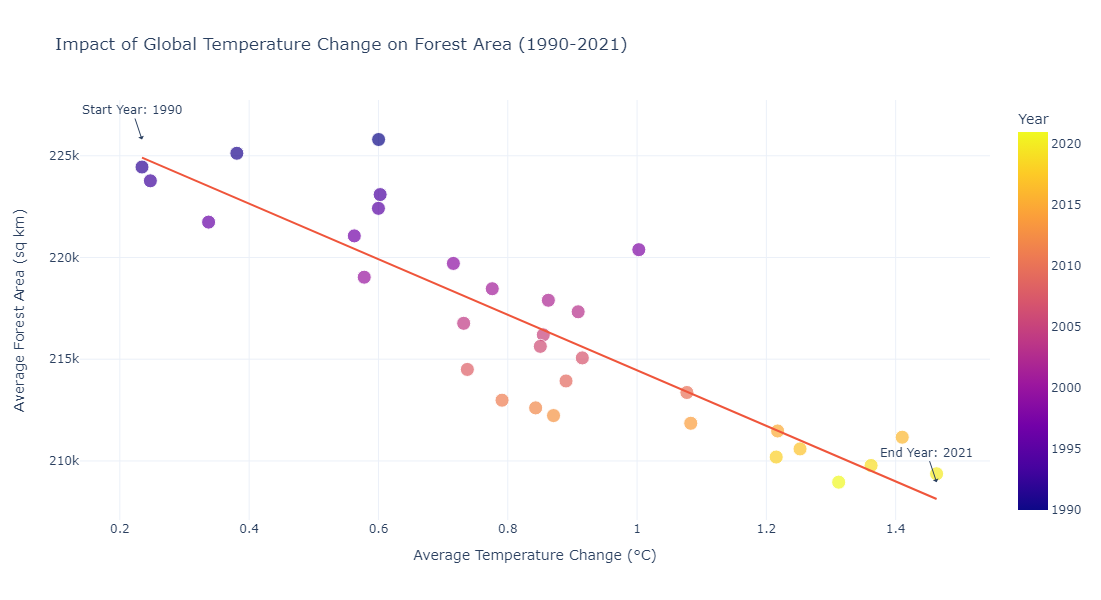

In [15]:
df_temp_melted = df_temp_changes.melt(id_vars=["Country Name"], var_name="Year", value_name="Temperature Change")
df_forest_melted = df_forest_area.melt(id_vars=["Country Name"], var_name="Year", value_name="Forest Area")
df_temp_melted = df_temp_melted[df_temp_melted['Year'].str.isnumeric()]
df_temp_melted['Year'] = df_temp_melted['Year'].astype(int)
df_forest_melted['Year'] = df_forest_melted['Year'].astype(int)
df_merged = pd.merge(df_temp_melted, df_forest_melted, on=["Country Name", "Year"], how="inner")
df_avg = df_merged.groupby('Year').agg({
    'Temperature Change': 'mean',
    'Forest Area': 'mean'
}).reset_index()
fig = px.scatter(df_avg, x='Temperature Change', y='Forest Area',
                 title='Global Forest Area vs. Temperature Change',
                 labels={'Temperature Change': 'Average Temperature Change (°C)', 'Forest Area': 'Average Forest Area (sq km)'},
                 color='Year', size='Year', size_max=10, hover_name='Year',
                 trendline='ols')
fig.update_layout(
    height=600,
    width=800,
    title='Impact of Global Temperature Change on Forest Area (1990-2021)',
    xaxis_title='Average Temperature Change (°C)',
    yaxis_title='Average Forest Area (sq km)',
    template='plotly_white'
)
fig.add_annotation(x=df_avg['Temperature Change'].min(), y=df_avg['Forest Area'].max(),
                   text="Start Year: 1990", showarrow=True, arrowhead=1)
fig.add_annotation(x=df_avg['Temperature Change'].max(), y=df_avg['Forest Area'].min(),
                   text="End Year: 2021", showarrow=True, arrowhead=1)
fig.show()